In [1]:


import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline



In [2]:


df = pd.read_csv("Training Data.csv")



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [4]:
df.drop('Id',axis=1,inplace=True)
df.shape

(252000, 12)

In [5]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


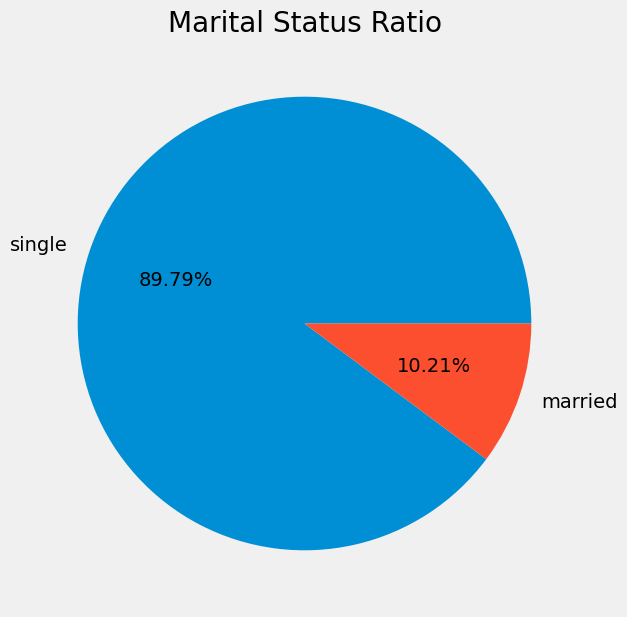

single     226272
married     25728
Name: Married/Single, dtype: int64

In [6]:
#Data Analysis

plt.figure(figsize=(7,7))
df['Married/Single'].value_counts().plot(kind='pie',autopct="%.2f%%")
plt.title("Marital Status Ratio")
plt.ylabel("")
plt.show()
df['Married/Single'].value_counts()



In [7]:

#Different Professions

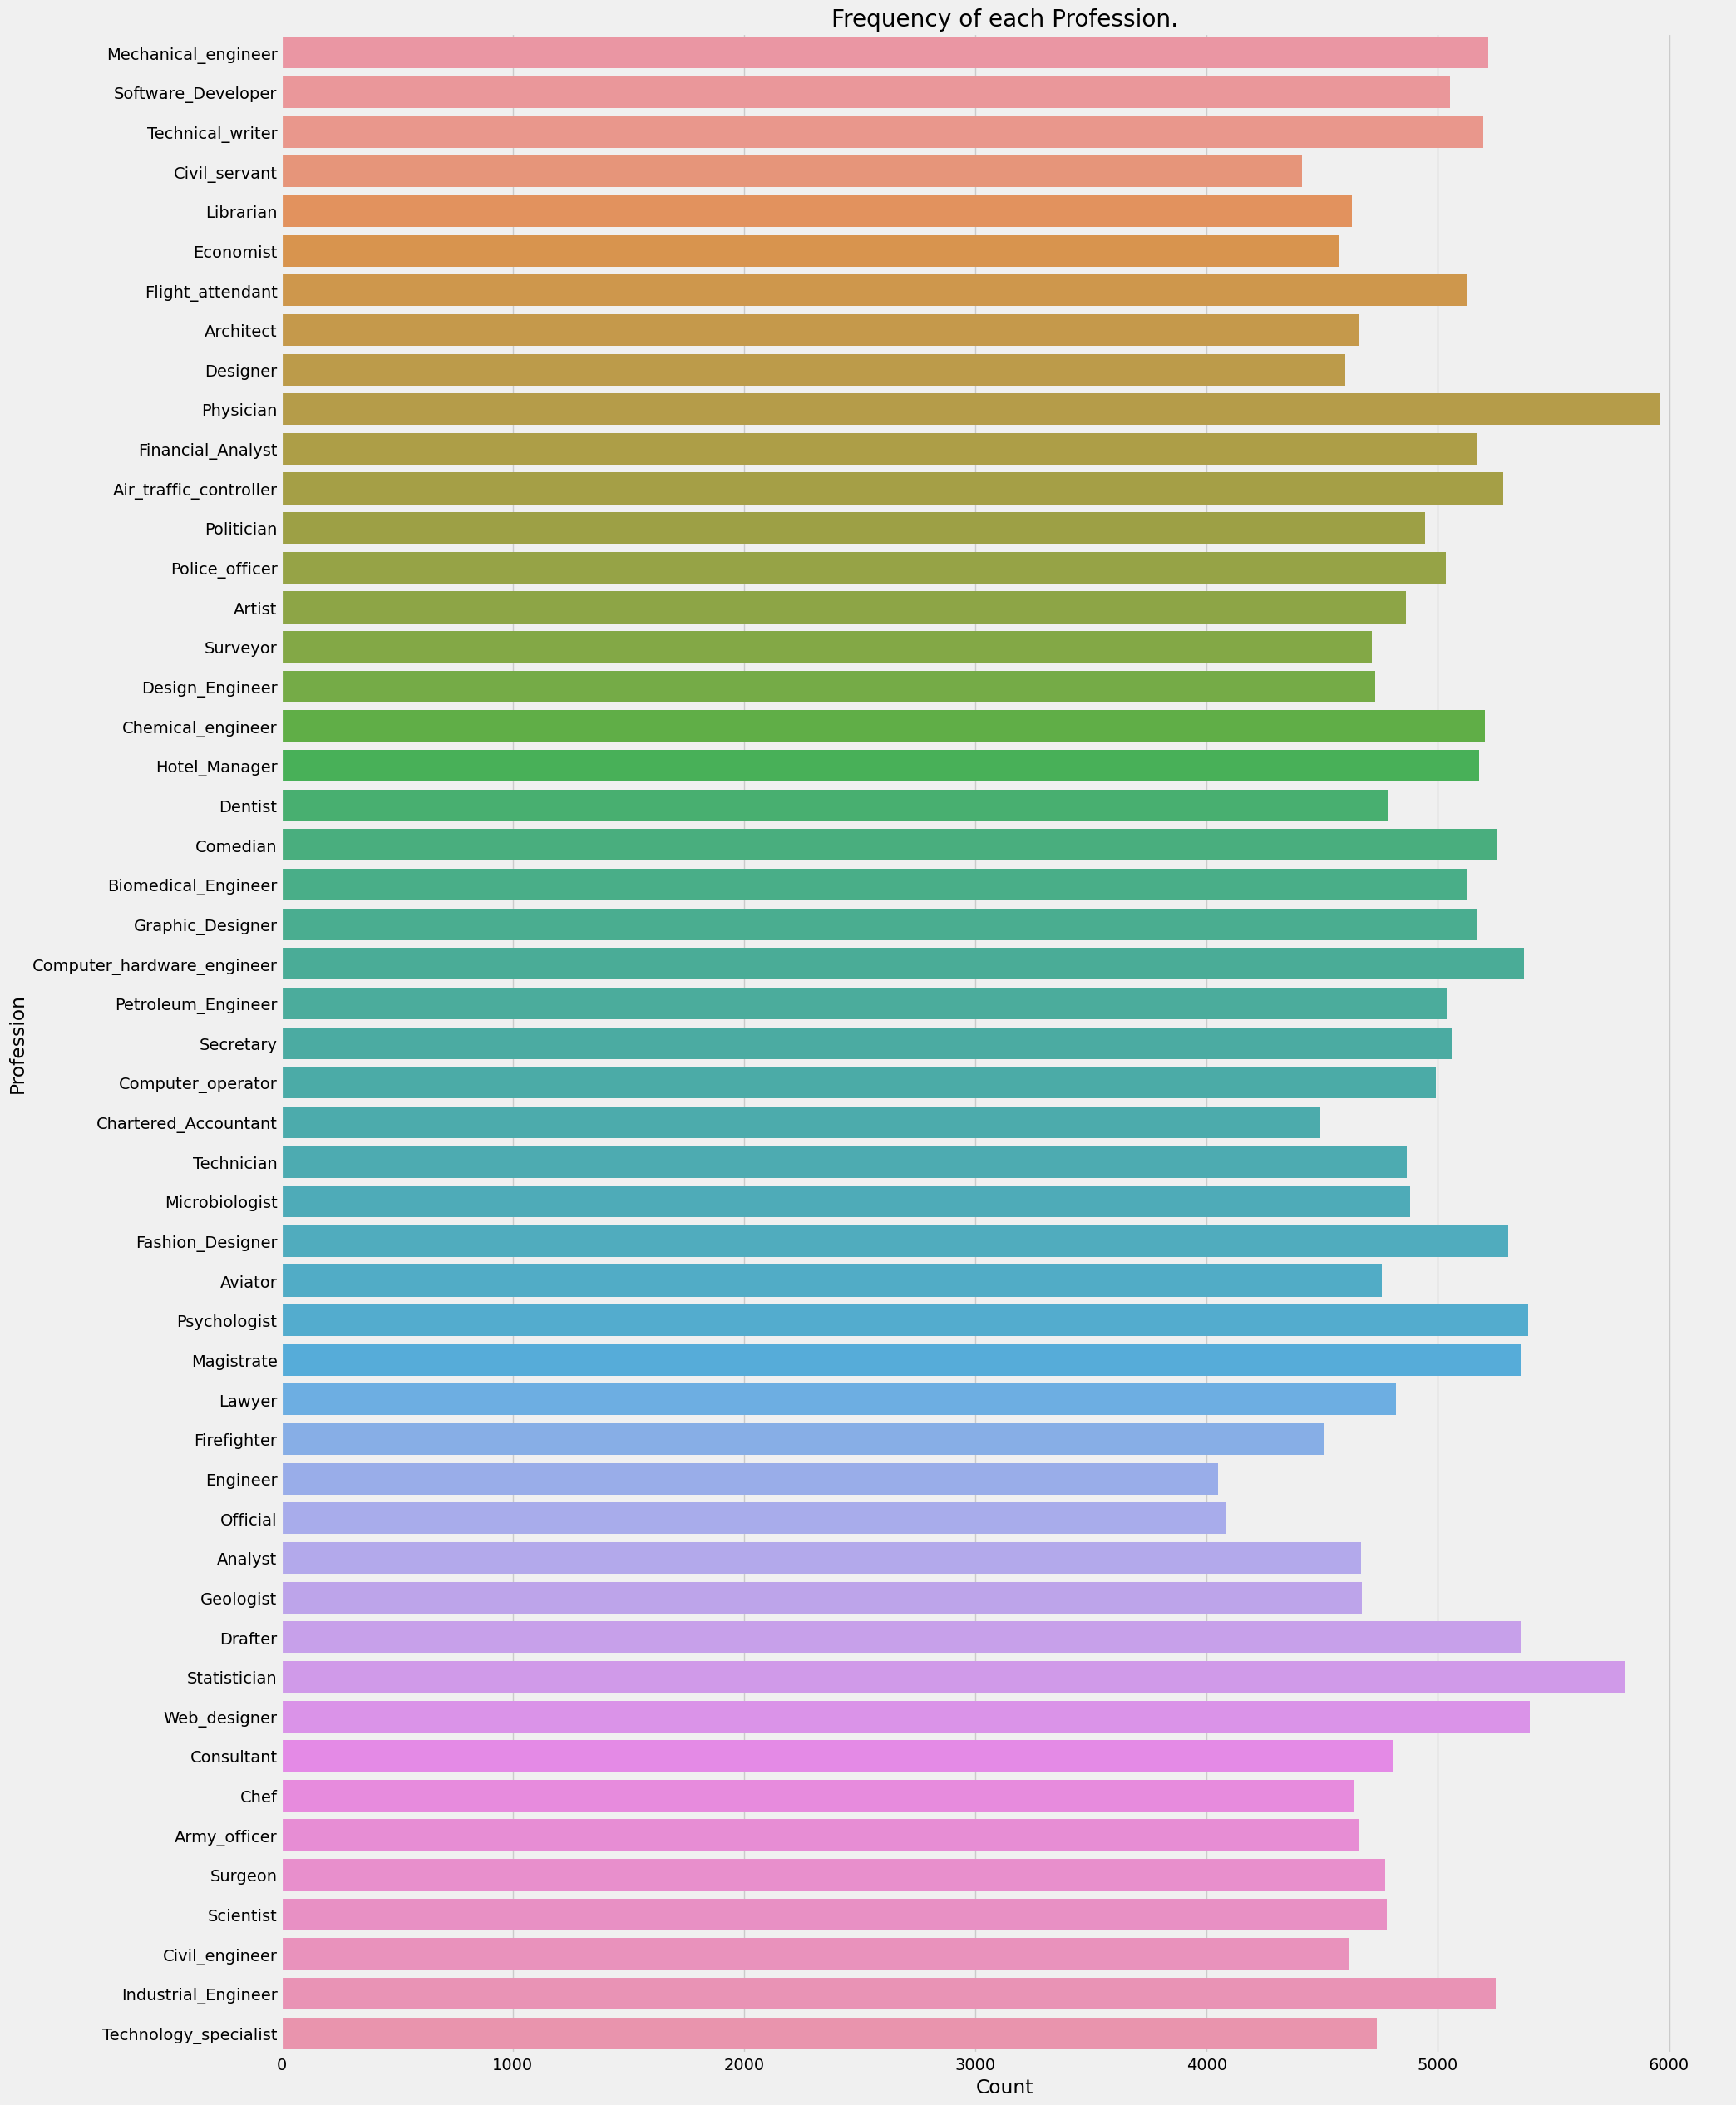

In [8]:


plt.figure(figsize=(20,30))
sns.countplot(y=df['Profession'])
plt.title("Frequency of each Profession.")
plt.ylabel("Profession")
plt.xlabel("Count")
plt.show()



In [9]:


professions = df.groupby('Profession')
professions_list = df['Profession'].unique()
professions_list



array(['Mechanical_engineer', 'Software_Developer', 'Technical_writer',
       'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant',
       'Architect', 'Designer', 'Physician', 'Financial_Analyst',
       'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist',
       'Surveyor', 'Design_Engineer', 'Chemical_engineer',
       'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer',
       'Graphic_Designer', 'Computer_hardware_engineer',
       'Petroleum_Engineer', 'Secretary', 'Computer_operator',
       'Chartered_Accountant', 'Technician', 'Microbiologist',
       'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate',
       'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst',
       'Geologist', 'Drafter', 'Statistician', 'Web_designer',
       'Consultant', 'Chef', 'Army_officer', 'Surgeon', 'Scientist',
       'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist'],
      dtype=object)

In [10]:
# Average Income, Age and Experience of each profession

In [11]:
avg_incomes = []
avg_age = []
avg_exp = []

In [12]:
for profession in professions_list:
    p_age_mean = professions.get_group(profession)['Age'].mean()
    p_income_mean = professions.get_group(profession)['Income'].mean()
    p_exp_mean = professions.get_group(profession)['Experience'].mean()
    
    avg_incomes.append(p_income_mean)
    avg_age.append(p_age_mean)
    avg_exp.append(p_exp_mean)

In [13]:


pdf = pd.DataFrame({
    'Profession':professions_list,
    'Average Age':avg_age,
    'Average Income':avg_incomes,
    'Average Experience':avg_exp
})

pdf.head()



,Profession,Average Age,Average Income,Average Experience
0,Mechanical_engineer,49.368986,5.175032e+06,9.526548
1,Software_Developer,50.060558,4.891296e+06,10.074807
2,Technical_writer,50.406352,4.922266e+06,9.887777
3,Civil_servant,52.756175,4.947843e+06,9.993429
4,Librarian,47.707433,5.007590e+06,9.091184


In [14]:
pdf.shape

(51, 4)

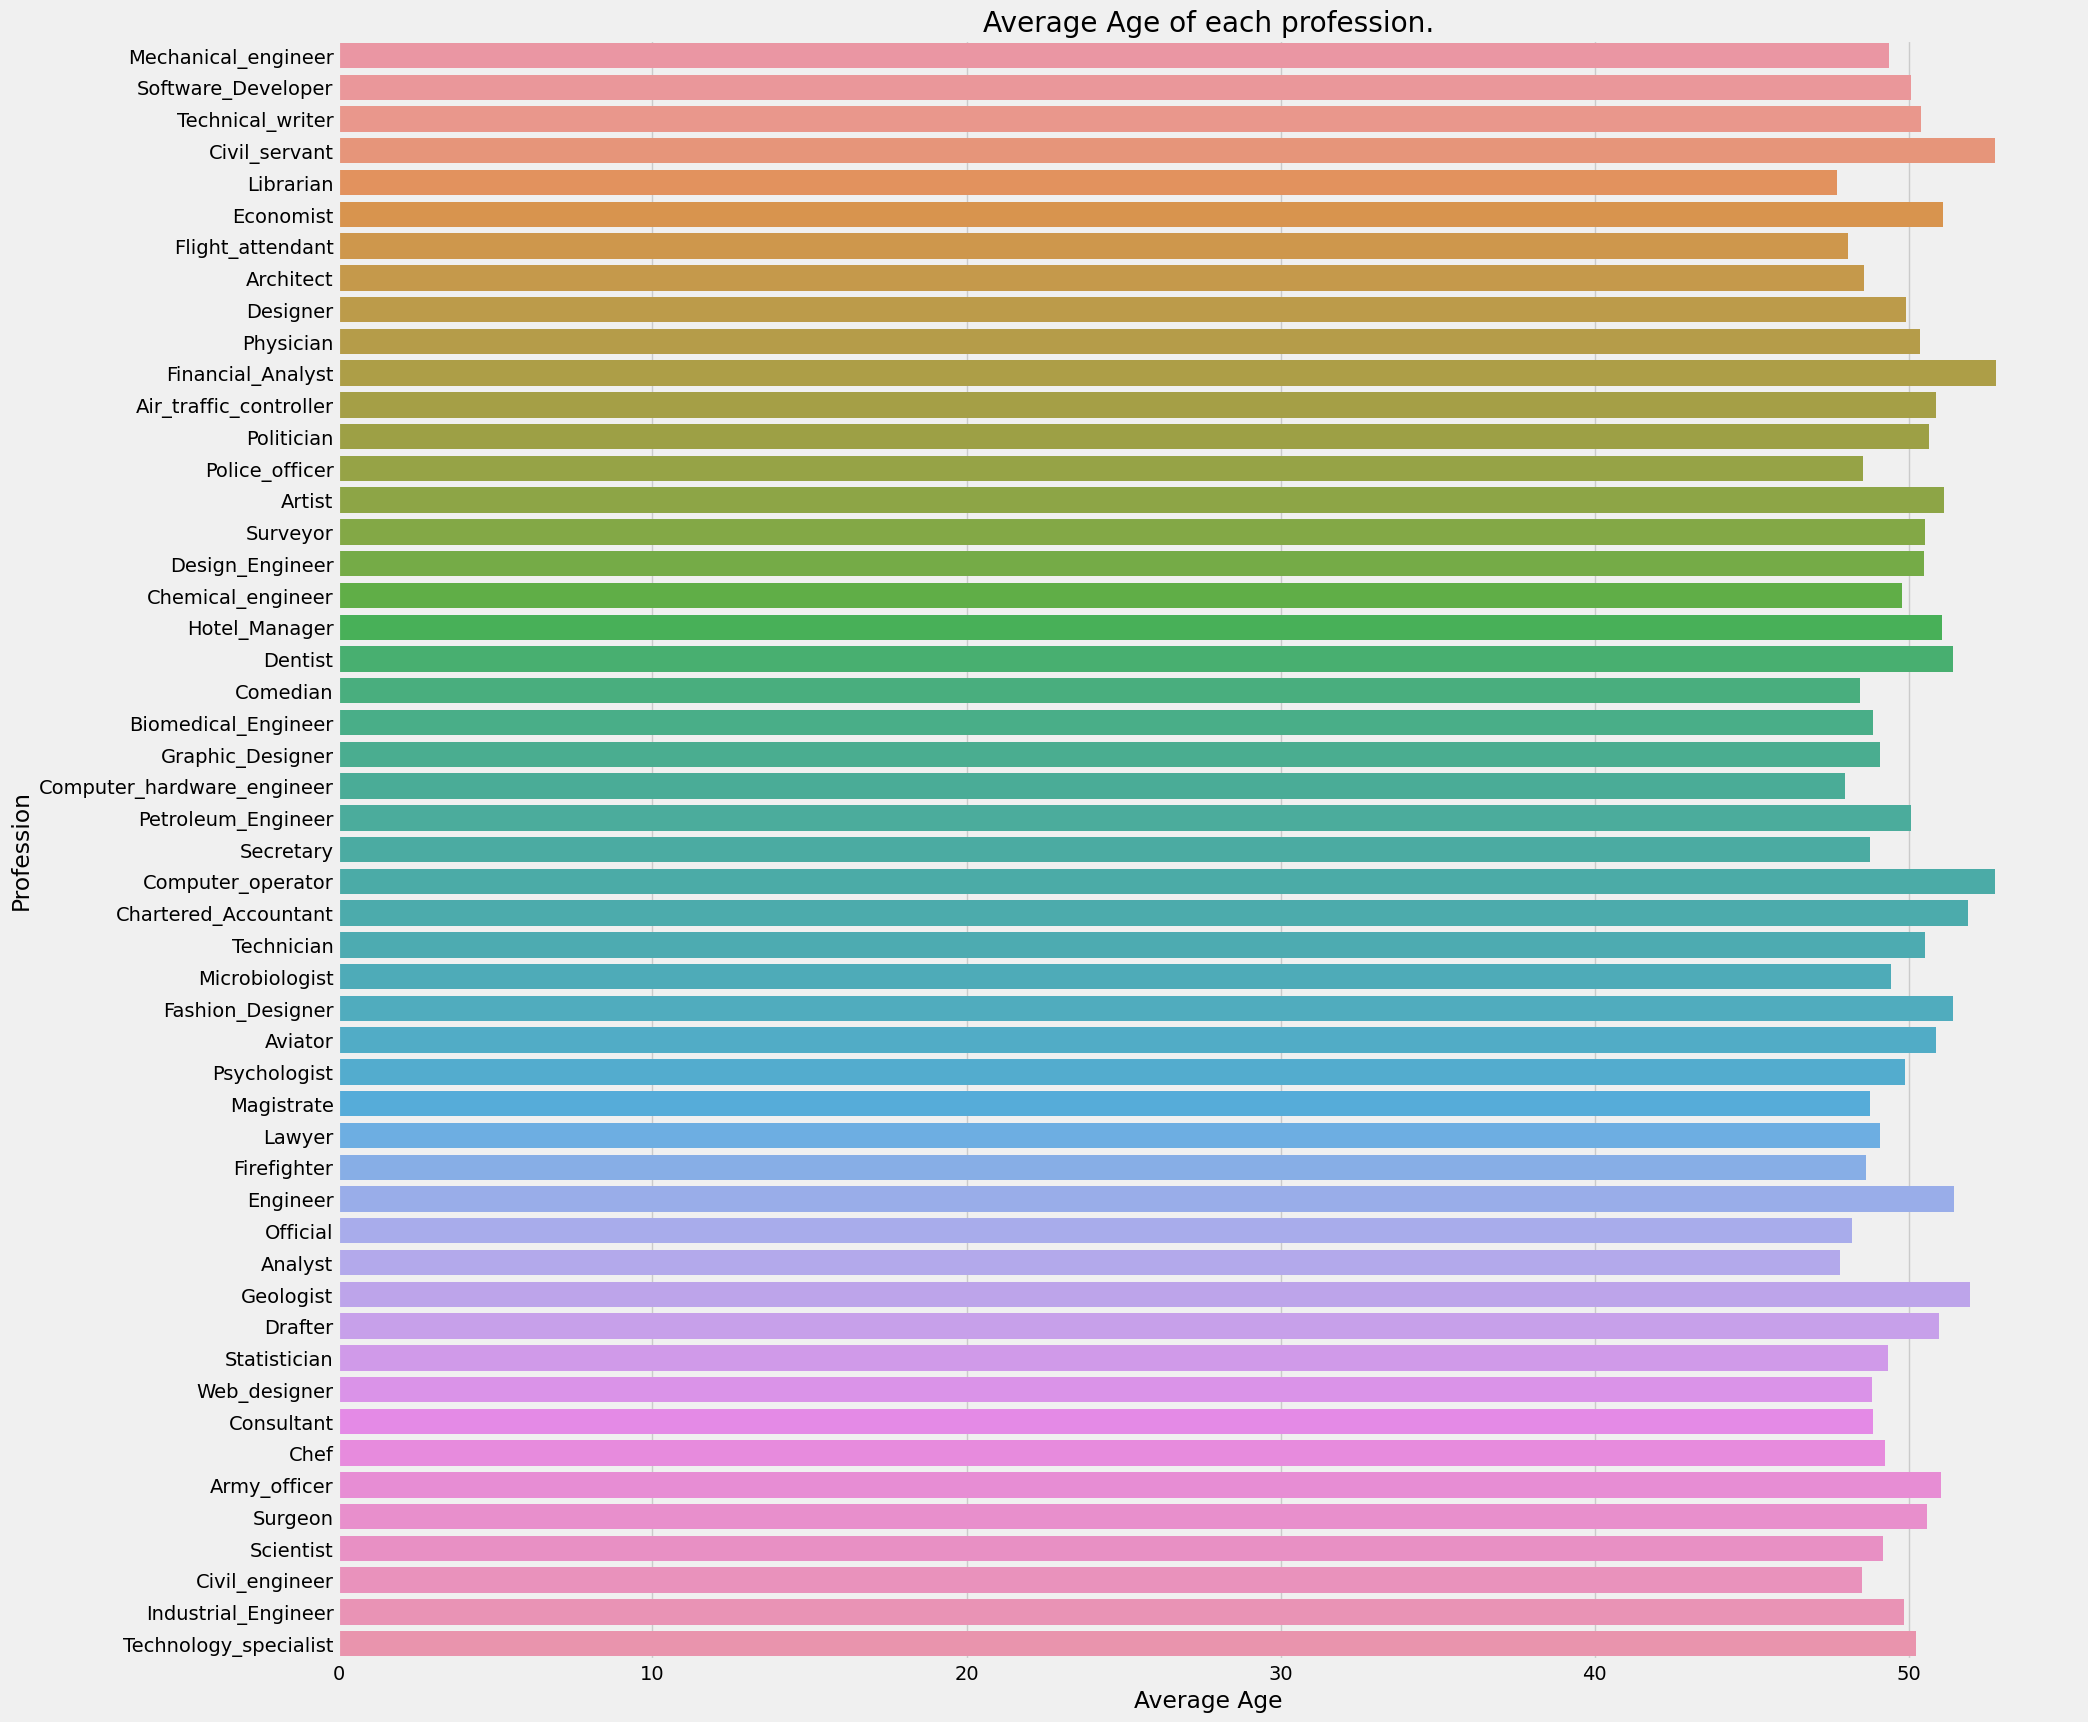

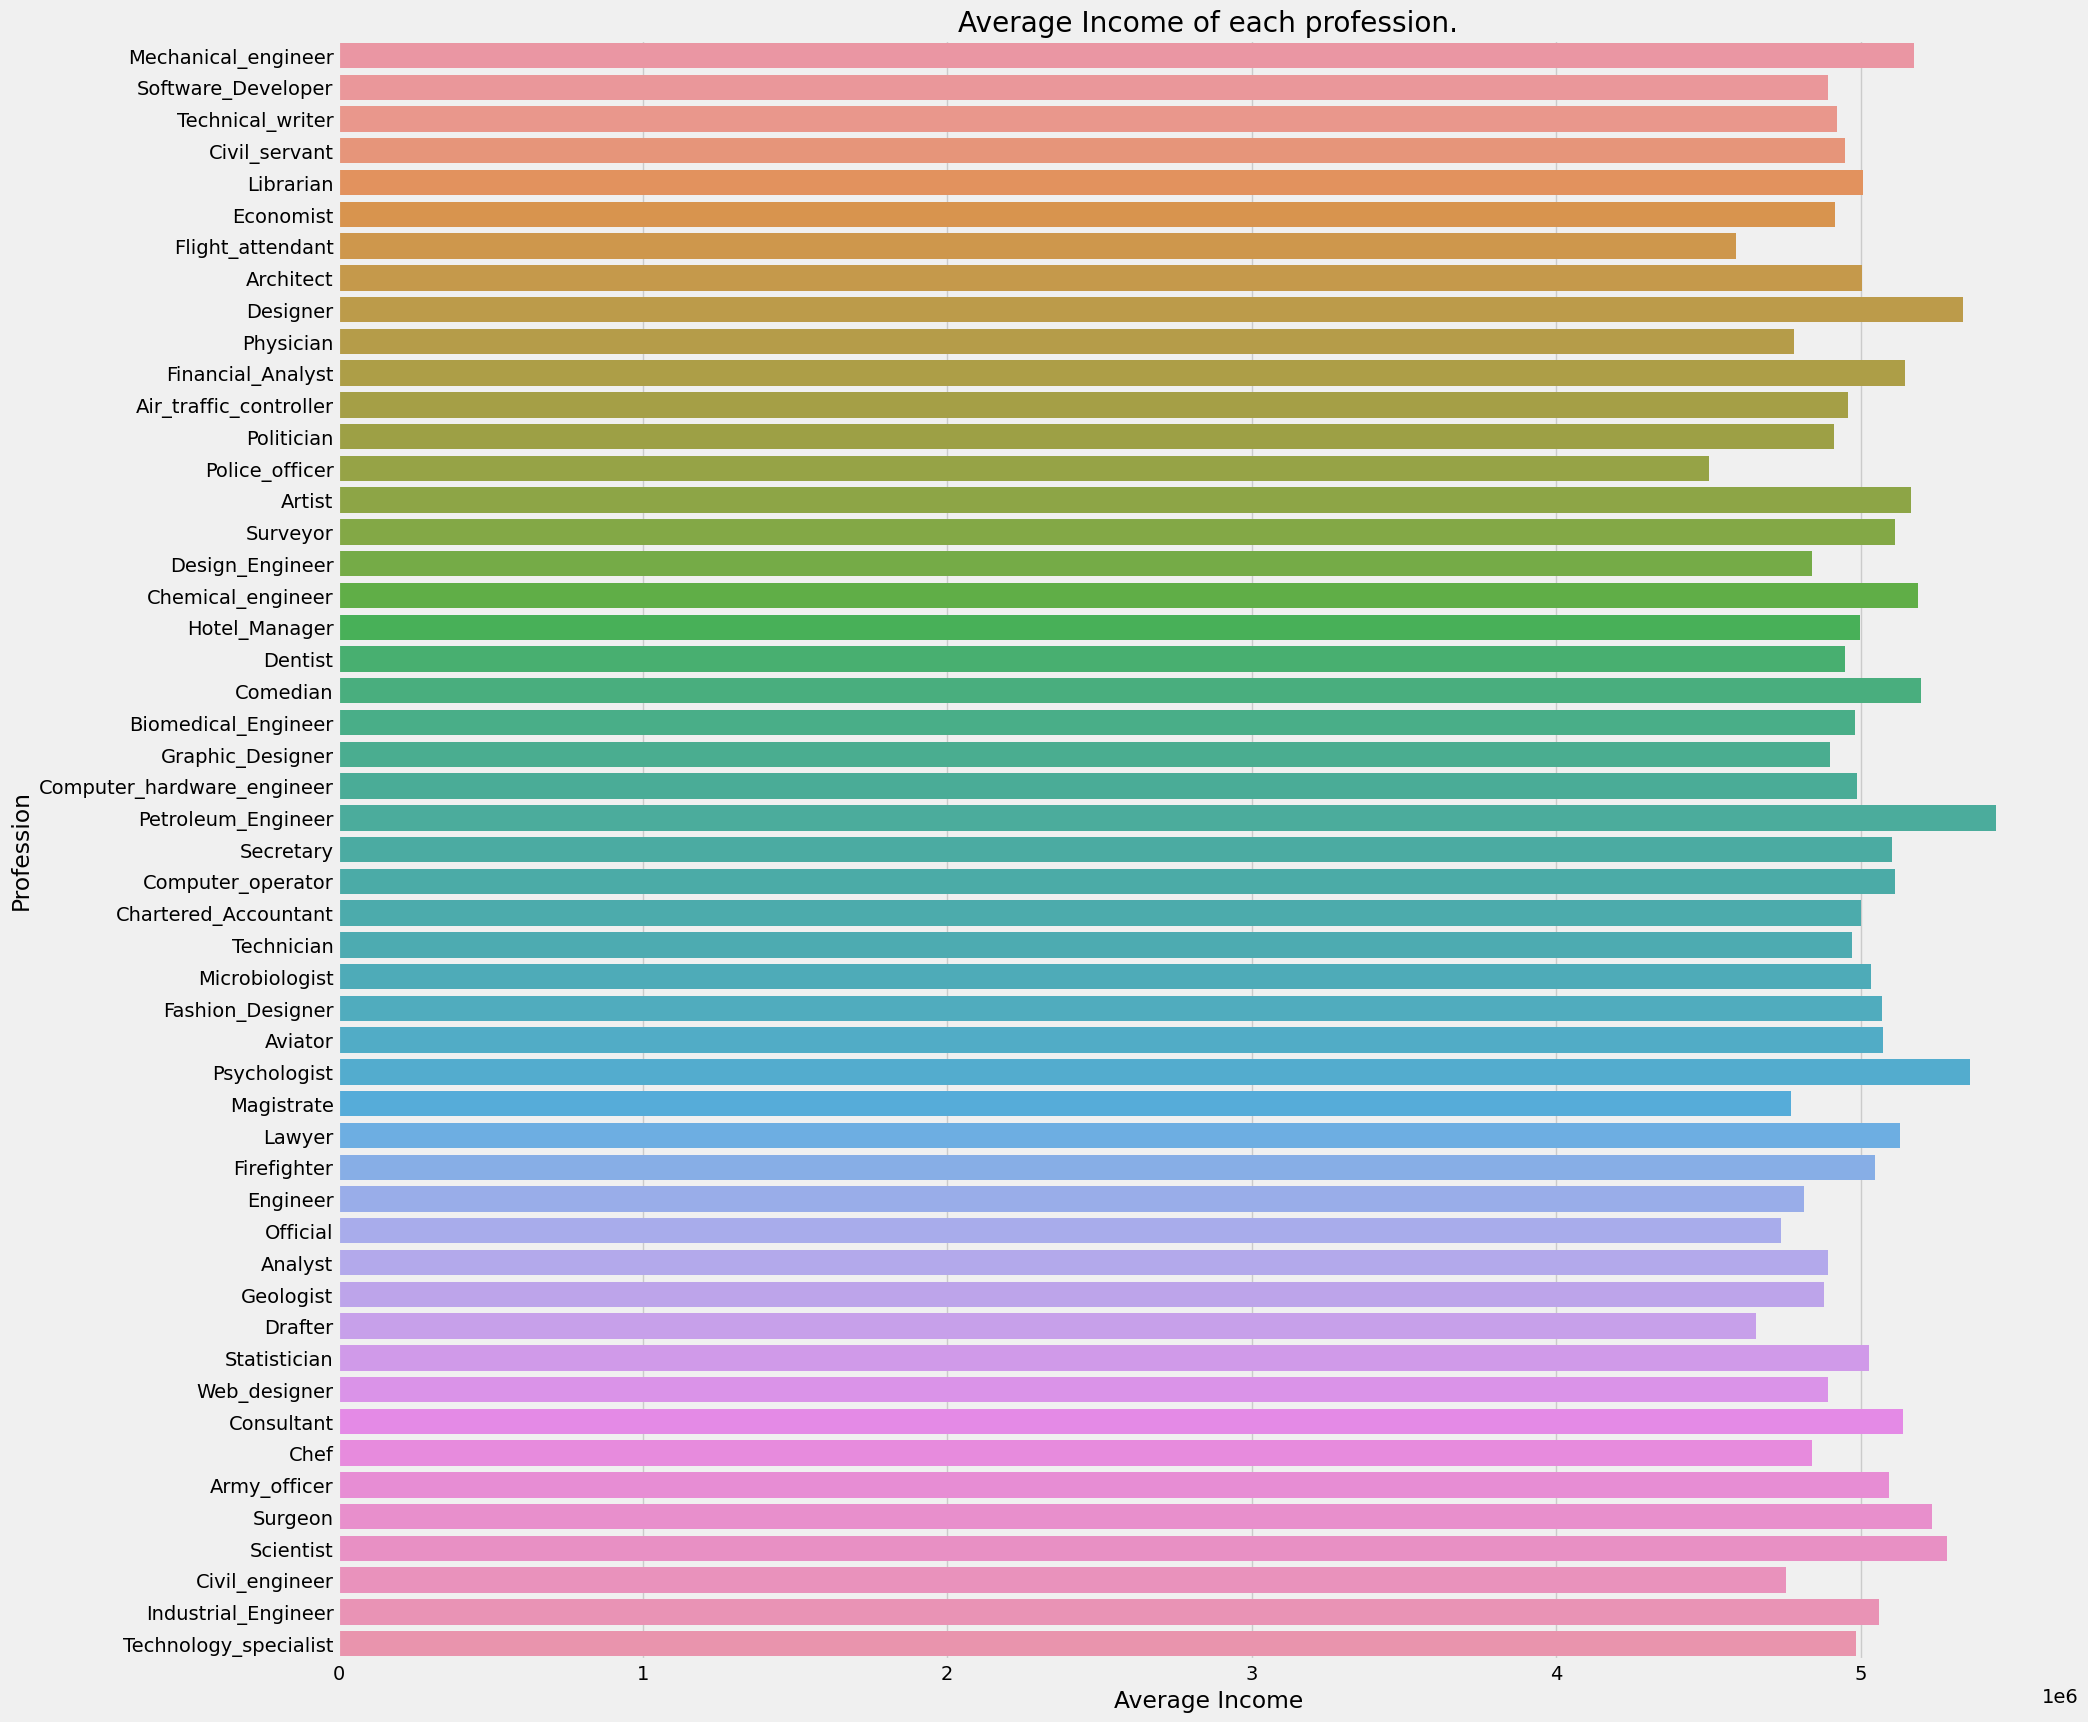

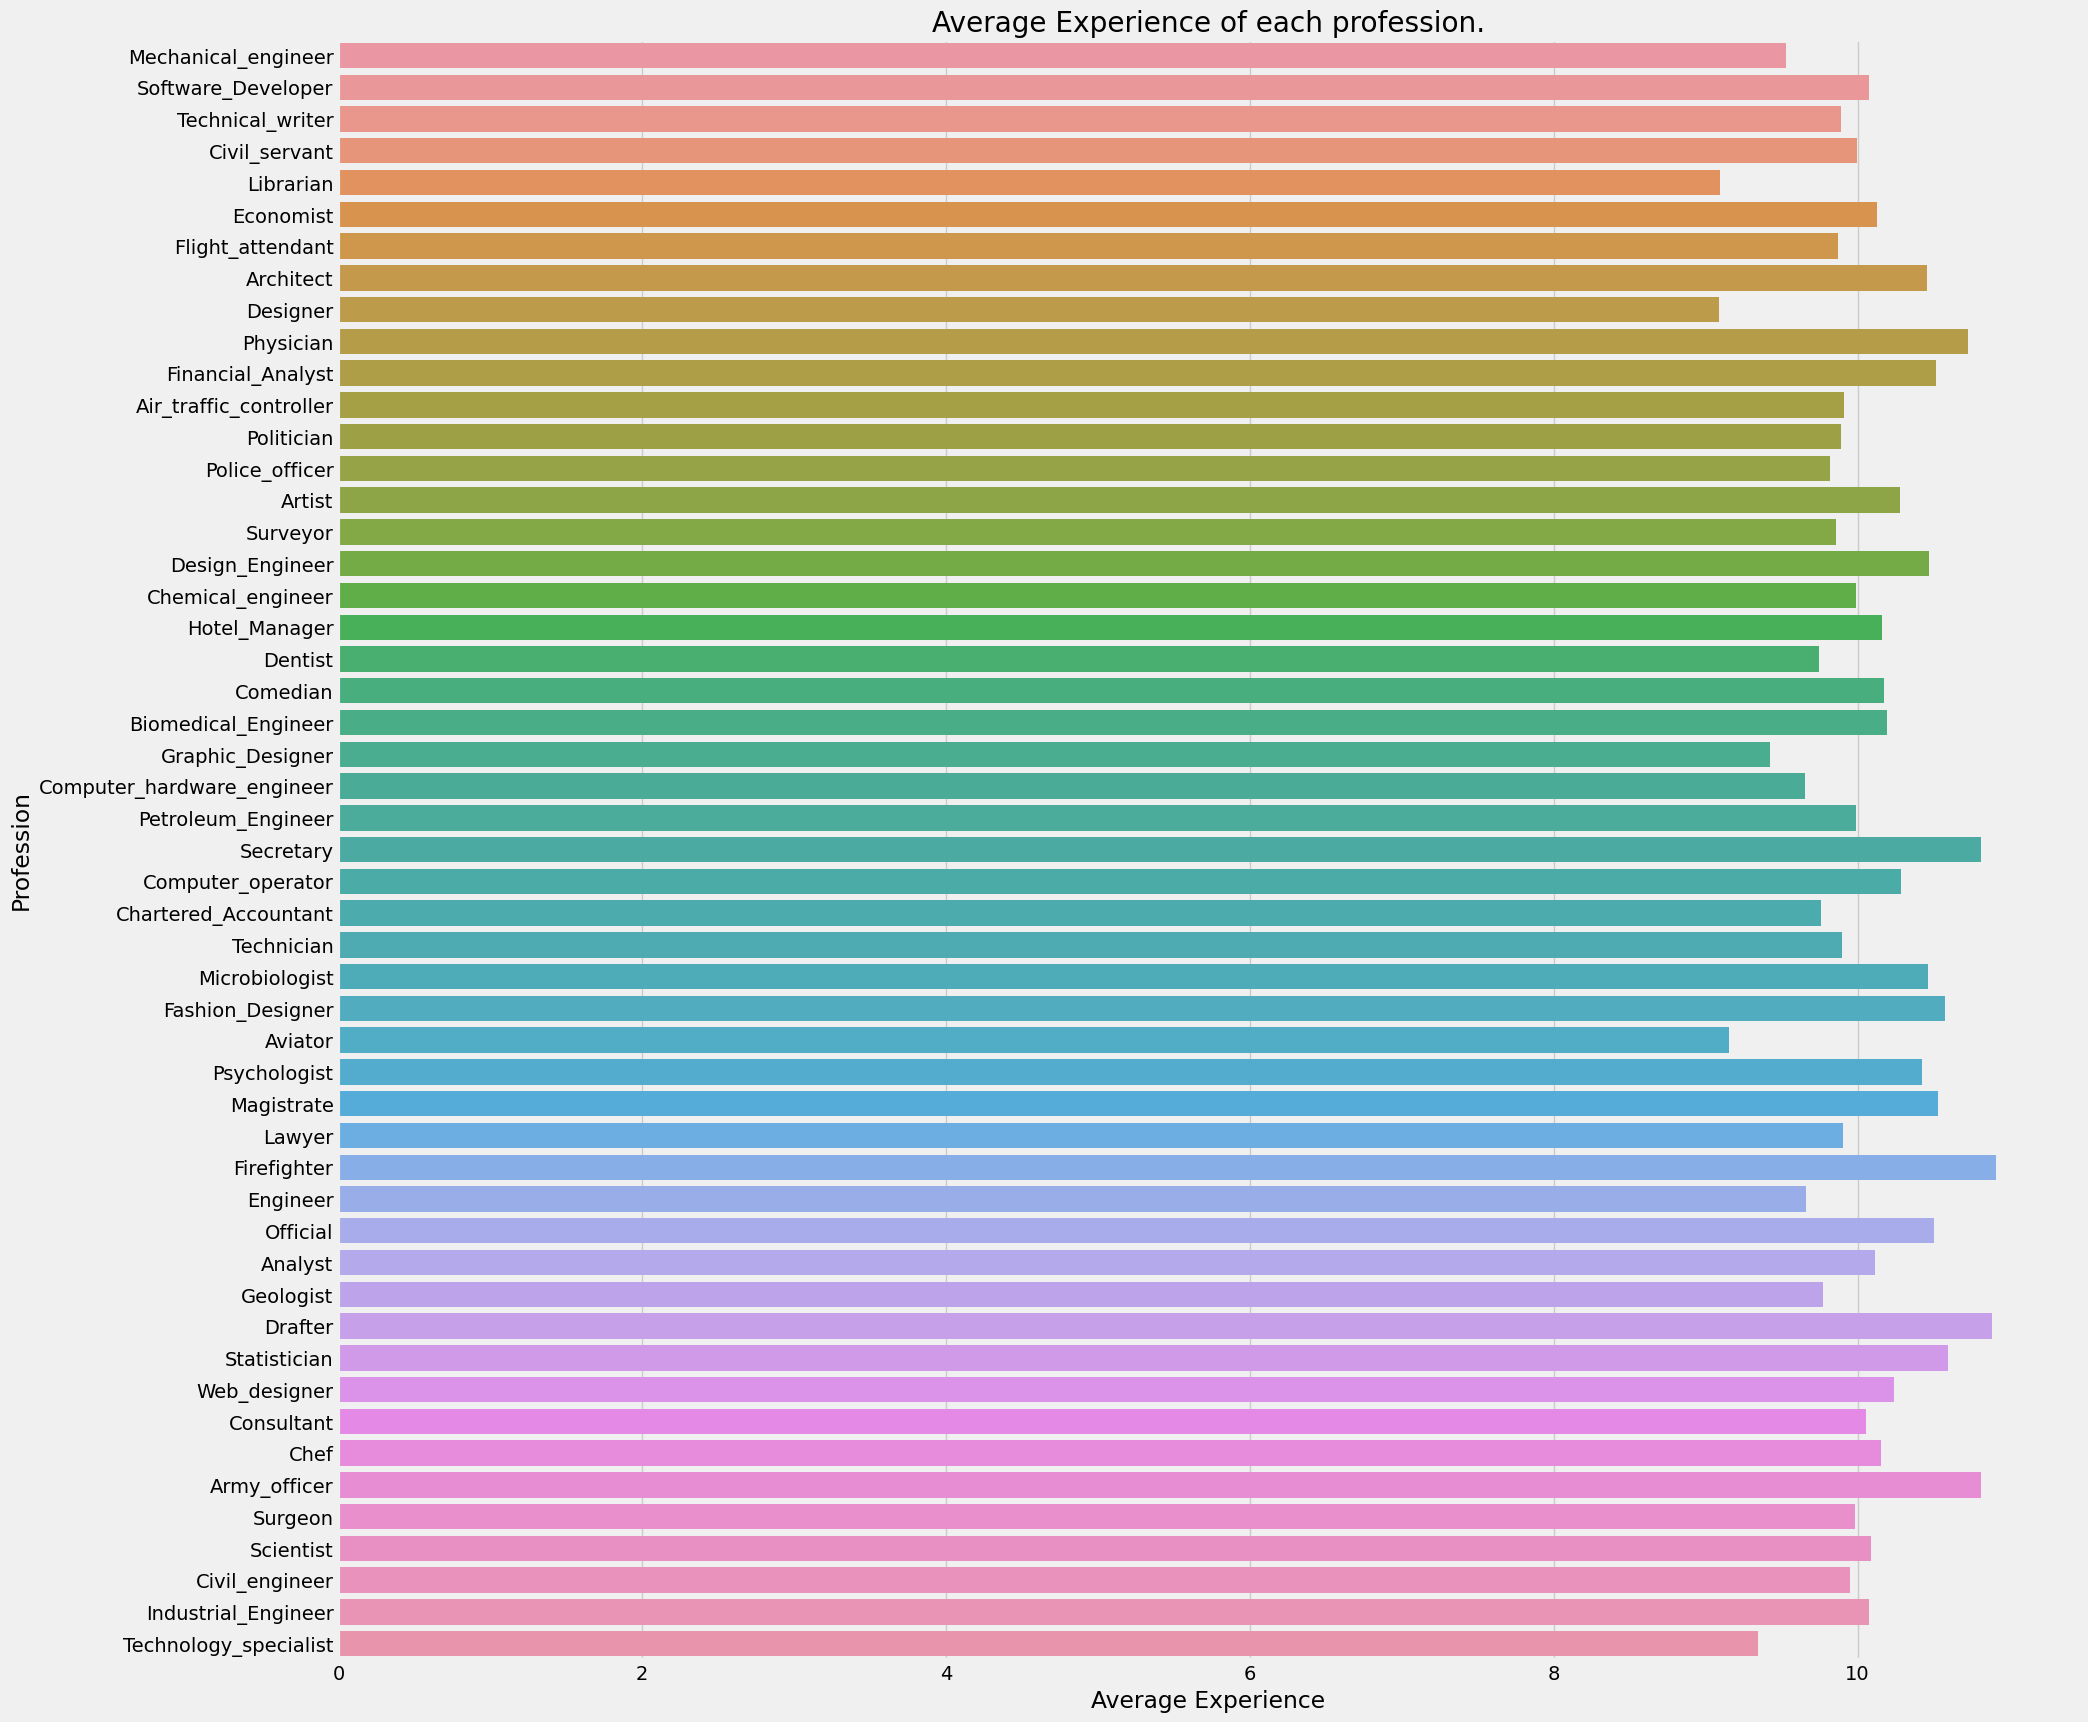

In [15]:


for col in pdf.columns[1:]:
    plt.figure(figsize=(20,20))
    sns.barplot(y=pdf['Profession'], x=pdf[col])
    plt.title(f"{col} of each profession.")
    plt.show()



In [16]:
# States count

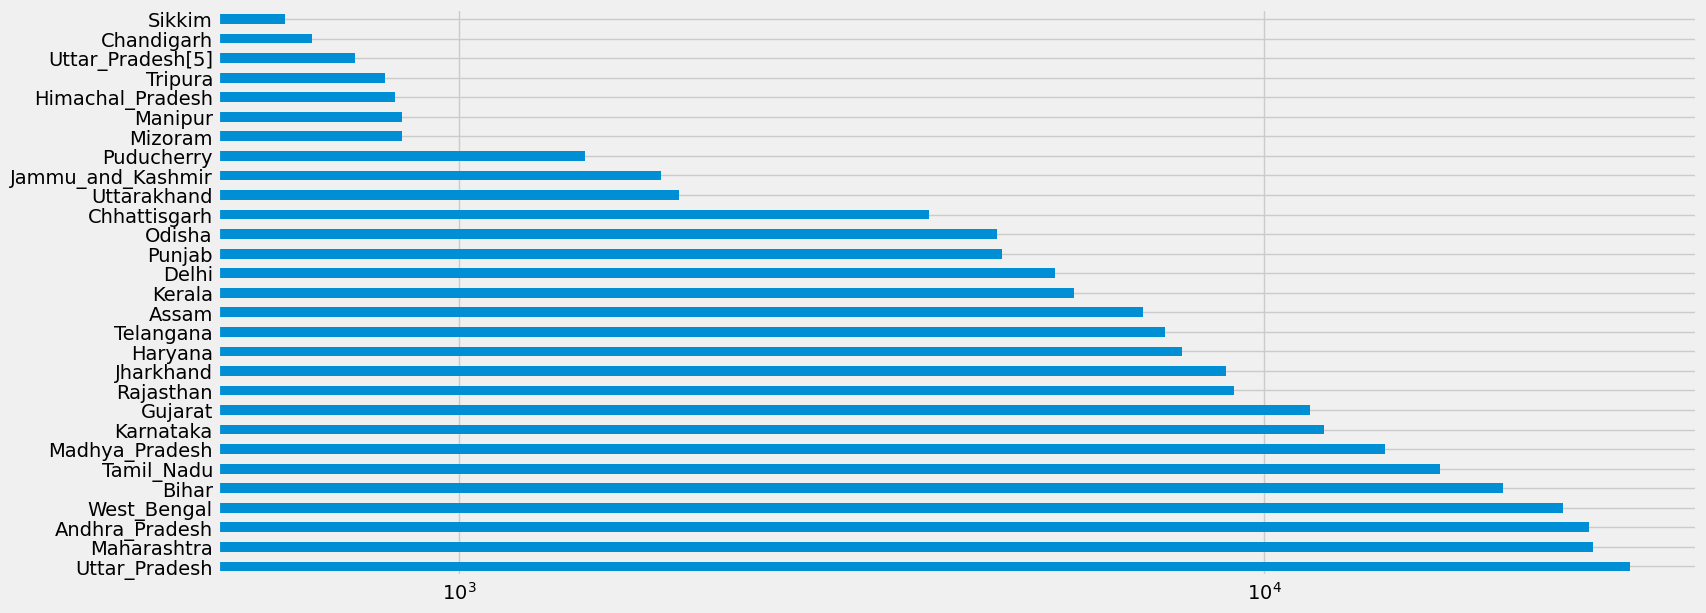

In [17]:
plt.figure(figsize=(17,7))
df['STATE'].value_counts().plot(kind='barh')
plt.xscale('log')
plt.show()

In [19]:
# Dropping CITY

In [20]:
df.drop(['CITY'],axis=1,inplace=True)
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tamil_Nadu,3,14,1


In [21]:
# One Hot Encoding

In [22]:
cols_to_encode = ['Married/Single','House_Ownership', 'Car_Ownership', 'Profession', 'STATE']
dummies = pd.get_dummies(df[cols_to_encode], drop_first=True)
dummies.shape

(252000, 82)

In [23]:


dummies.head()



,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,Profession_Analyst,Profession_Architect,Profession_Army_officer,Profession_Artist,Profession_Aviator,Profession_Biomedical_Engineer,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West_Bengal
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [24]:
#Feature Scaling

In [25]:
df.drop(cols_to_encode, axis=1, inplace=True)
df.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,3,13,0
1,7574516,40,10,9,13,0
2,3991815,66,4,4,10,0
3,6256451,41,2,2,12,1
4,5768871,47,11,3,14,1


In [26]:
scale = MinMaxScaler()
scalled = scale.fit_transform(df.drop('Risk_Flag',axis=1))

In [27]:


i = 0
for col in df.columns[:-1]:
    df[col] = scalled[:,i]
    i += 1



In [28]:
df.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,0.129487,0.034483,0.15,0.214286,0.75,0
1,0.757206,0.327586,0.50,0.642857,0.75,0
2,0.398564,0.775862,0.20,0.285714,0.00,0
3,0.625263,0.344828,0.10,0.142857,0.50,1
4,0.576454,0.448276,0.55,0.214286,1.00,1


In [29]:


df.describe()



,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,0.499198,0.499208,0.504222,0.452420,0.499448,0.123000
std,0.288130,0.294204,0.300129,0.260504,0.349759,0.328438
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249529,0.241379,0.250000,0.214286,0.250000,0.000000
50%,0.499557,0.500000,0.500000,0.428571,0.500000,0.000000
75%,0.747495,0.758621,0.750000,0.642857,0.750000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
# Combining the data

In [31]:
ndf = pd.concat([df,dummies], axis=1)
ndf.shape

(252000, 88)

In [32]:
# Risk Flag Ratio

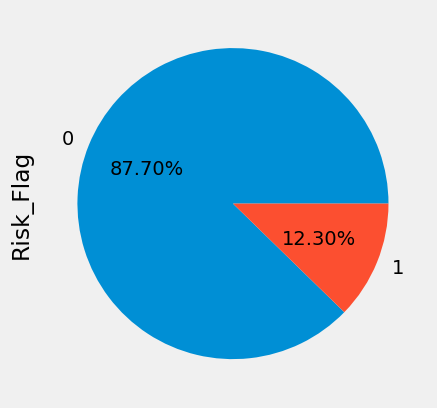

In [33]:
ndf['Risk_Flag'].value_counts().plot(kind='pie', autopct="%.2f%%")
plt.show()

In [34]:
# Imbalanced Data

In [35]:


ndf['Risk_Flag'].value_counts()



0    221004
1     30996
Name: Risk_Flag, dtype: int64

In [36]:
# # 
# Under Sampling

In [37]:
class0 = ndf[ndf['Risk_Flag'] == 0].sample(34589)
class0.shape

(34589, 88)

In [38]:


class1 = ndf[ndf['Risk_Flag'] == 1]
class1.shape



(30996, 88)

In [39]:
# Combining class0 and class1

In [40]:
ndf2 = pd.concat([class0,class1], axis=0) 
ndf2.shape

(65585, 88)

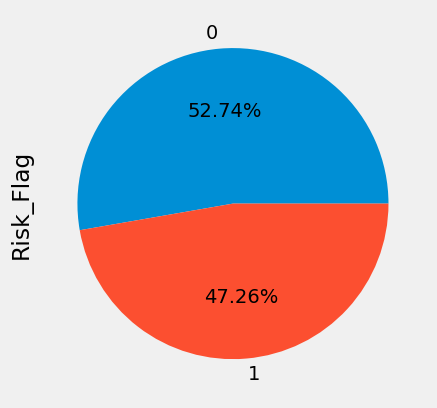

In [41]:
ndf2['Risk_Flag'].value_counts().plot(kind='pie', autopct="%.2f%%")
plt.show()

In [42]:
x, y = ndf2.drop('Risk_Flag',axis=1),ndf2['Risk_Flag']
x.shape, y.shape

((65585, 87), (65585,))

In [43]:
# Splitting the dataset into the Training set and Test set

In [44]:


X_train, X_test, Y_train, Y_test = train_test_split(x,y,random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape



((49188, 87), (16397, 87), (49188,), (16397,))

In [45]:
# Model Building

In [46]:
model = keras.Sequential([
    keras.layers.Dense(174, input_shape=(87,), activation='relu'),
    keras.layers.Dense(87, activation='relu'),
    keras.layers.Dense(44, activation='relu'),
    keras.layers.Dense(22, activation='relu'),
    keras.layers.Dense(11, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [47]:
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20,batch_size=512)

Epoch 1/20
97/97 [==============================] - 5s 13ms/step - loss: 0.6840 - accuracy: 0.5587 - val_loss: 0.6741 - val_accuracy: 0.5801
Epoch 2/20
97/97 [==============================] - 1s 8ms/step - loss: 0.6458 - accuracy: 0.6301 - val_loss: 0.6162 - val_accuracy: 0.6673
Epoch 3/20
97/97 [==============================] - 1s 10ms/step - loss: 0.5735 - accuracy: 0.7110 - val_loss: 0.5552 - val_accuracy: 0.7332
Epoch 4/20
97/97 [==============================] - 1s 12ms/step - loss: 0.5149 - accuracy: 0.7631 - val_loss: 0.5533 - val_accuracy: 0.7259
Epoch 5/20
97/97 [==============================] - 1s 12ms/step - loss: 0.4777 - accuracy: 0.7915 - val_loss: 0.4916 - val_accuracy: 0.7929
Epoch 6/20
97/97 [==============================] - 1s 7ms/step - loss: 0.4442 - accuracy: 0.8153 - val_loss: 0.4876 - val_accuracy: 0.7975
Epoch 7/20
97/97 [==============================] - 1s 6ms/step - loss: 0.4224 - accuracy: 0.8290 - val_loss: 0.4753 - val_accuracy: 0.8047
Epoch 8/20
97/97

In [48]:

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 174)               15312     
                                                                 
 dense_1 (Dense)             (None, 87)                15225     
                                                                 
 dense_2 (Dense)             (None, 44)                3872      
                                                                 
 dense_3 (Dense)             (None, 22)                990       
                                                                 
 dense_4 (Dense)             (None, 11)                253       
                                                                 
 dense_5 (Dense)             (None, 1)                 12        
                                                                 
Total params: 35,664
Trainable params: 35,664
Non-traina

In [49]:
# Visualize the accuracy and loss to check whether our model is overfitting or not

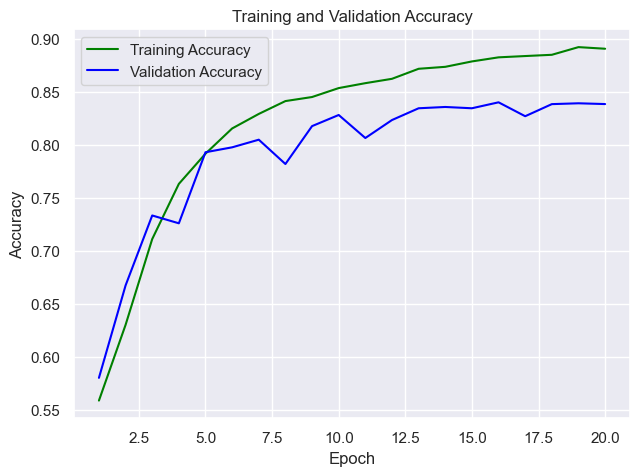

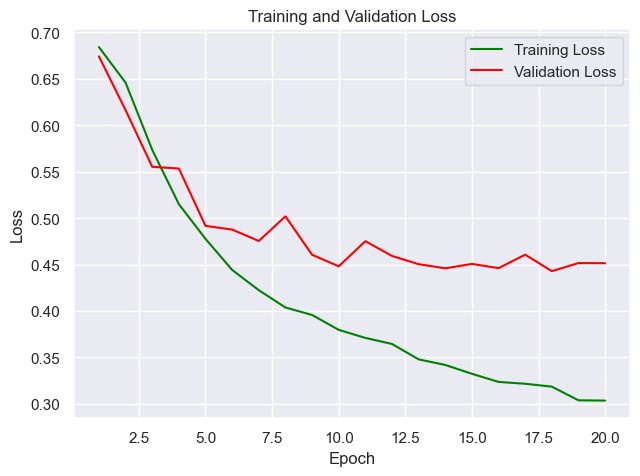

In [50]:
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# Accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
# Loss plot
plt.plot(epochs, loss, color='green', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [51]:
# Prediction

In [52]:
def predict(model, X):
    pred = model.predict(X).flatten()
    pred[pred >= 0.6] = 1
    pred[pred < 0.6] = 0
    return pred

def plot_actual_vs_predicted(y_true,y_pred,title=None):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7,7))
    sns.heatmap(cm, annot=True, fmt='g')
    
    #Labelling
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(title)
    plt.show()

1538/1538 [==============================] - 6s 4ms/step


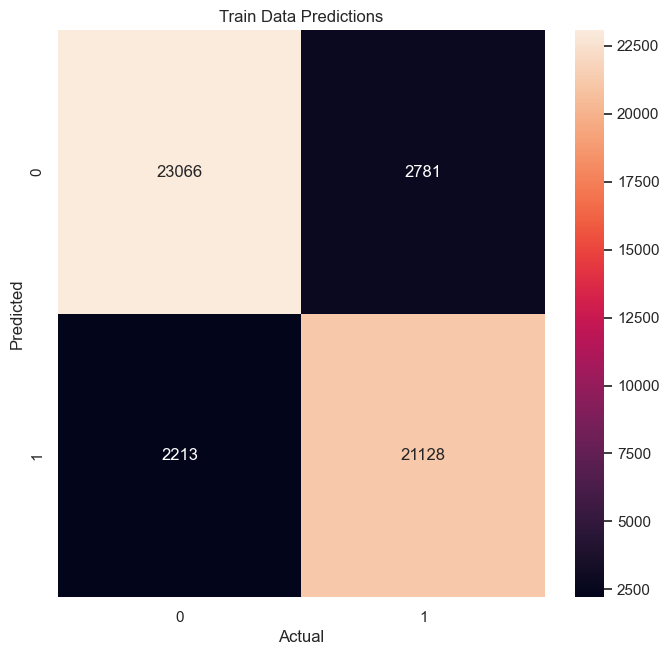

              precision    recall  f1-score   support

           0       0.91      0.89      0.90     25847
           1       0.88      0.91      0.89     23341

    accuracy                           0.90     49188
   macro avg       0.90      0.90      0.90     49188
weighted avg       0.90      0.90      0.90     49188



In [53]:


y_train_pred = predict(model, X_train)
plot_actual_vs_predicted(Y_train, y_train_pred, 'Train Data Predictions')
print(classification_report(Y_train, y_train_pred))



513/513 [==============================] - 3s 6ms/step


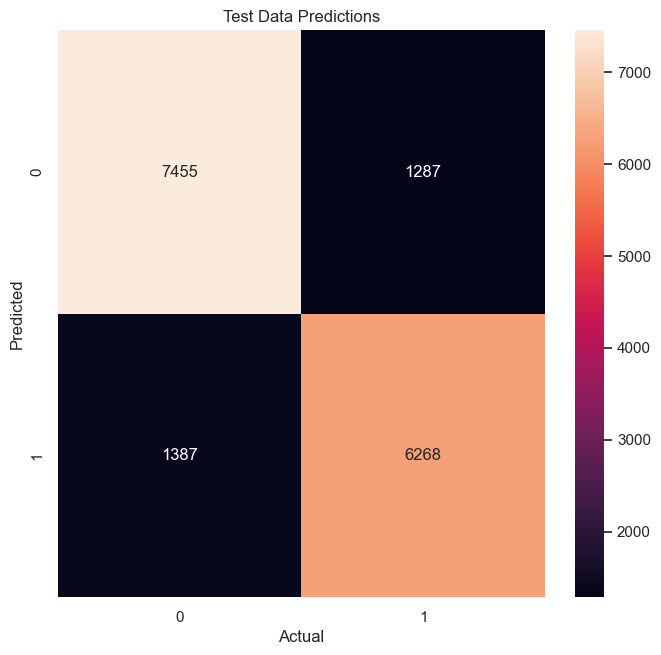

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      8742
           1       0.83      0.82      0.82      7655

    accuracy                           0.84     16397
   macro avg       0.84      0.84      0.84     16397
weighted avg       0.84      0.84      0.84     16397



In [54]:
y_test_pred = predict(model, X_test)
plot_actual_vs_predicted(Y_test, y_test_pred, 'Test Data Predictions')
print(classification_report(Y_test, y_test_pred))

In [55]:

model.save('loan.h5')

